# Nutrition5K 数据集完整性检查

本notebook用于检查下载的Nutrition5K数据集是否完整。

**运行前请确保：**
- 已经解压了 `comp-90086-nutrition-5-k.zip`
- 数据目录结构正确

In [2]:
# 导入必要的库
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# 设置数据根目录 - 根据你的实际路径修改这里
DATA_ROOT = Path('Nutrition5K') / 'Nutrition5K'

print('数据根目录:', DATA_ROOT)

数据根目录: Nutrition5K\Nutrition5K


## 1. 检查目录结构

In [3]:
print('=' * 50)
print('检查数据完整性')
print('=' * 50)

def report_split(split_dir: Path, split_name: str) -> None:
    """报告训练集或测试集的目录信息"""
    if split_dir.exists():
        print(f"\n{split_name} 集合：")
        modality_dirs = ['color', 'depth_color', 'depth_raw']
        for modality in modality_dirs:
            dir_path = split_dir / modality
            if dir_path.exists():
                dish_dirs = [p for p in dir_path.iterdir() if p.is_dir()]
                print(f"✅ {split_name}/{modality}/ 存在 - 包含 {len(dish_dirs):,} 个菜品目录")
            else:
                print(f"❌ {split_name}/{modality}/ 不存在")
    else:
        print(f"❌ {split_name} 目录不存在")

train_dir = DATA_ROOT / 'train'
test_dir = DATA_ROOT / 'test'

report_split(train_dir, 'train')
report_split(test_dir, 'test')

检查数据完整性

train 集合：
✅ train/color/ 存在 - 包含 3,301 个菜品目录
✅ train/depth_color/ 存在 - 包含 3,301 个菜品目录
✅ train/depth_raw/ 存在 - 包含 3,301 个菜品目录

test 集合：
✅ test/color/ 存在 - 包含 189 个菜品目录
✅ test/depth_color/ 存在 - 包含 189 个菜品目录
✅ test/depth_raw/ 存在 - 包含 189 个菜品目录


## 2. 检查训练标签文件

In [4]:
csv_path = DATA_ROOT / 'nutrition5k_train.csv'

print('=' * 50)
print('训练标签文件')
print('=' * 50)

if csv_path.exists():
    df = pd.read_csv(csv_path)
    print('✅ nutrition5k_train.csv 存在')
    print(f"   - 行数: {len(df):,}")
    print(f"   - 列名: {list(df.columns)}")
    print('\n前5行数据:')
    display(df.head())
else:
    print('❌ nutrition5k_train.csv 不存在')
    df = None

训练标签文件
✅ nutrition5k_train.csv 存在
   - 行数: 3,301
   - 列名: ['ID', 'Value']

前5行数据:


,ID,Value
0,dish_0000,221.167068
1,dish_0001,140.980011
2,dish_0002,274.335999
3,dish_0003,589.501648
4,dish_0004,258.599670


## 3. 卡路里分布统计

卡路里统计信息：
count    3301.000000
mean      237.374622
std       221.328638
min         0.000000
25%        60.839996
50%       186.959702
75%       359.408569
max      3943.325195
Name: Value, dtype: float64


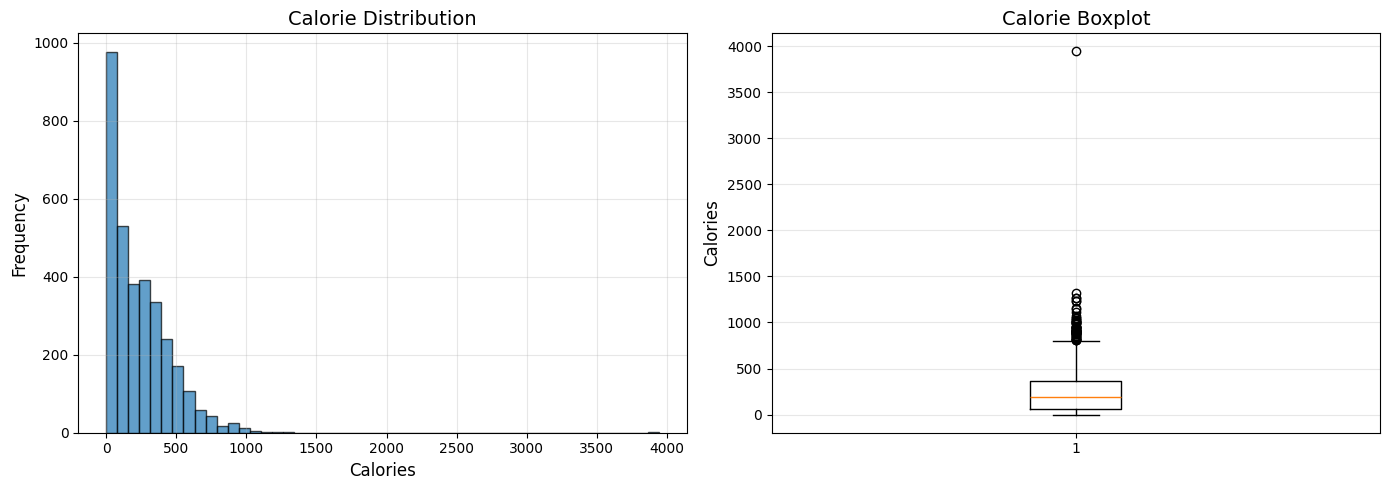

In [5]:
if df is not None:
    # 假设卡路里列名可能是 'calories' 或第二列
    calorie_col = [col for col in df.columns if 'calorie' in col.lower()]
    if calorie_col:
        calorie_col = calorie_col[0]
    else:
        calorie_col = df.columns[1]  # 假设第二列是卡路里
    
    print('卡路里统计信息：')
    print(df[calorie_col].describe())
    
    # 可视化
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    axes[0].hist(df[calorie_col], bins=50, edgecolor='black', alpha=0.7)
    axes[0].set_xlabel('Calories', fontsize=12)
    axes[0].set_ylabel('Frequency', fontsize=12)
    axes[0].set_title('Calorie Distribution', fontsize=14)
    axes[0].grid(alpha=0.3)
    
    axes[1].boxplot(df[calorie_col])
    axes[1].set_ylabel('Calories', fontsize=12)
    axes[1].set_title('Calorie Boxplot', fontsize=14)
    axes[1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()

## 4. 检查样本文件完整性

In [6]:
if df is not None:
    print('=' * 50)
    print('检查样本文件完整性（前5个菜品）')
    print('=' * 50)
    
    id_column = df.columns[0]
    sample_ids = df[id_column].head(5)
    
    for dish_id in sample_ids:
        print(f"\n{dish_id}:")
        rgb_path = train_dir / 'color' / dish_id / 'rgb.png'
        depth_color_path = train_dir / 'depth_color' / dish_id / 'depth_color.png'
        depth_raw_path = train_dir / 'depth_raw' / dish_id / 'depth_raw.png'

        print(f"  RGB: {'✅' if rgb_path.exists() else '❌'}")
        print(f"  Depth Color: {'✅' if depth_color_path.exists() else '❌'}")
        print(f"  Depth Raw: {'✅' if depth_raw_path.exists() else '❌'}")

检查样本文件完整性（前5个菜品）

dish_0000:
  RGB: ✅
  Depth Color: ✅
  Depth Raw: ✅

dish_0001:
  RGB: ✅
  Depth Color: ✅
  Depth Raw: ✅

dish_0002:
  RGB: ✅
  Depth Color: ✅
  Depth Raw: ✅

dish_0003:
  RGB: ✅
  Depth Color: ✅
  Depth Raw: ✅

dish_0004:
  RGB: ✅
  Depth Color: ✅
  Depth Raw: ✅


## 5. 可视化样本图像

随机可视化5个样本：



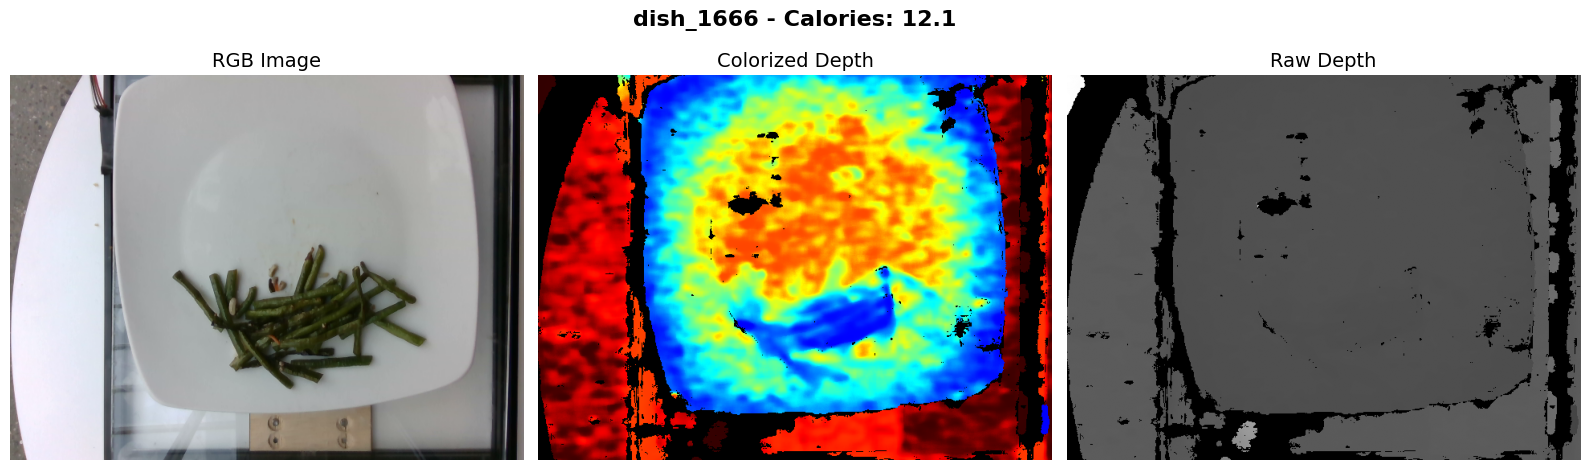

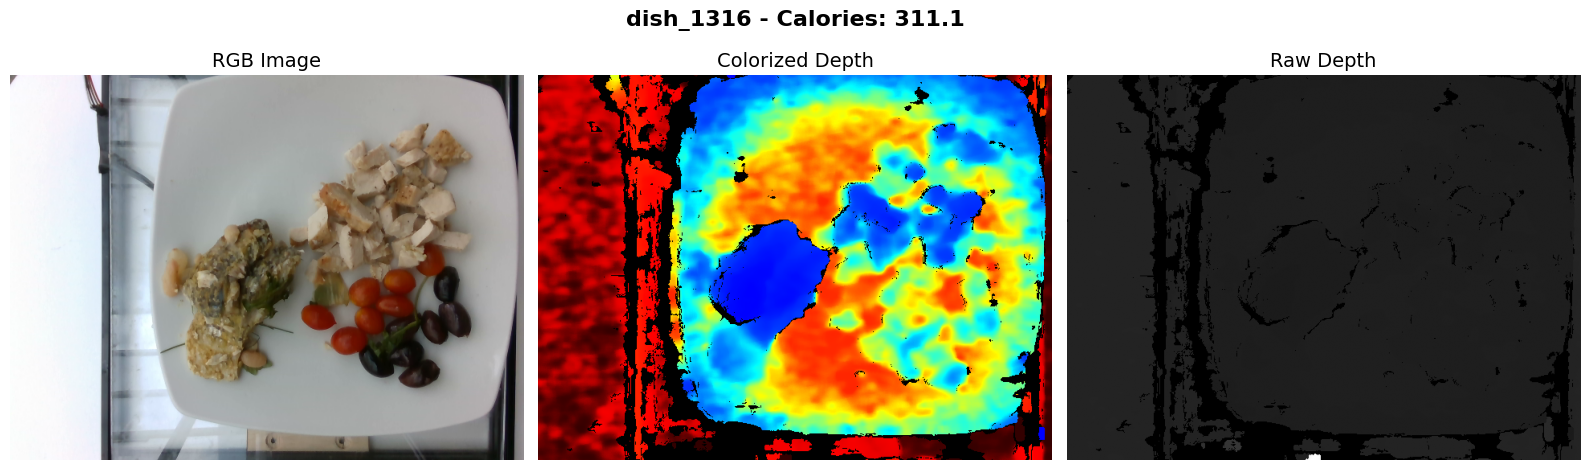

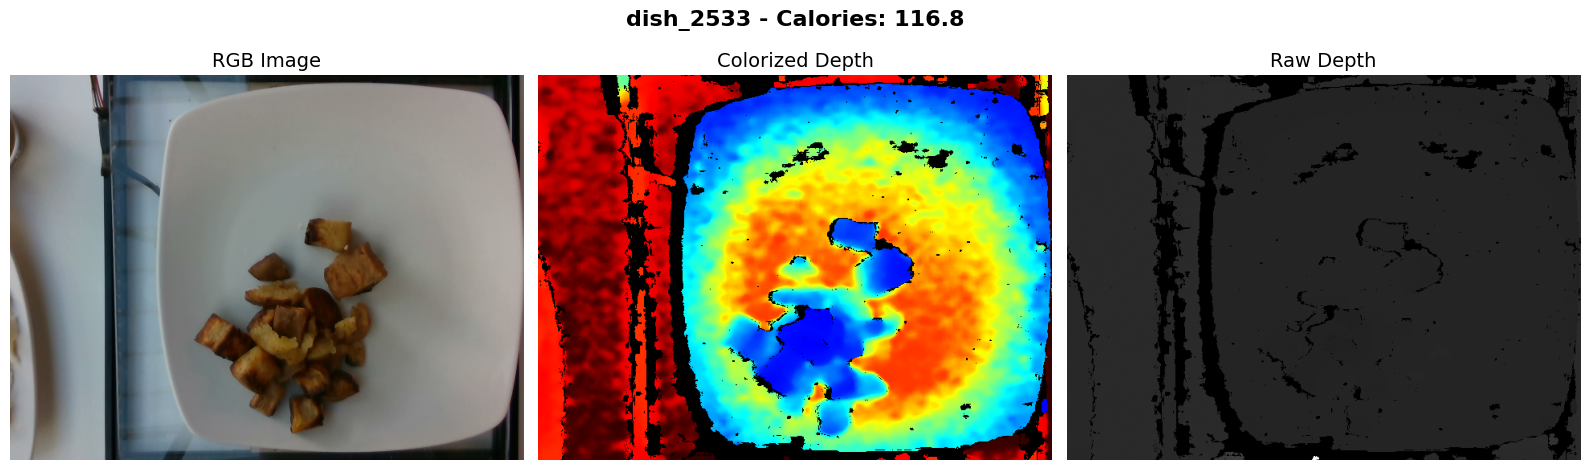

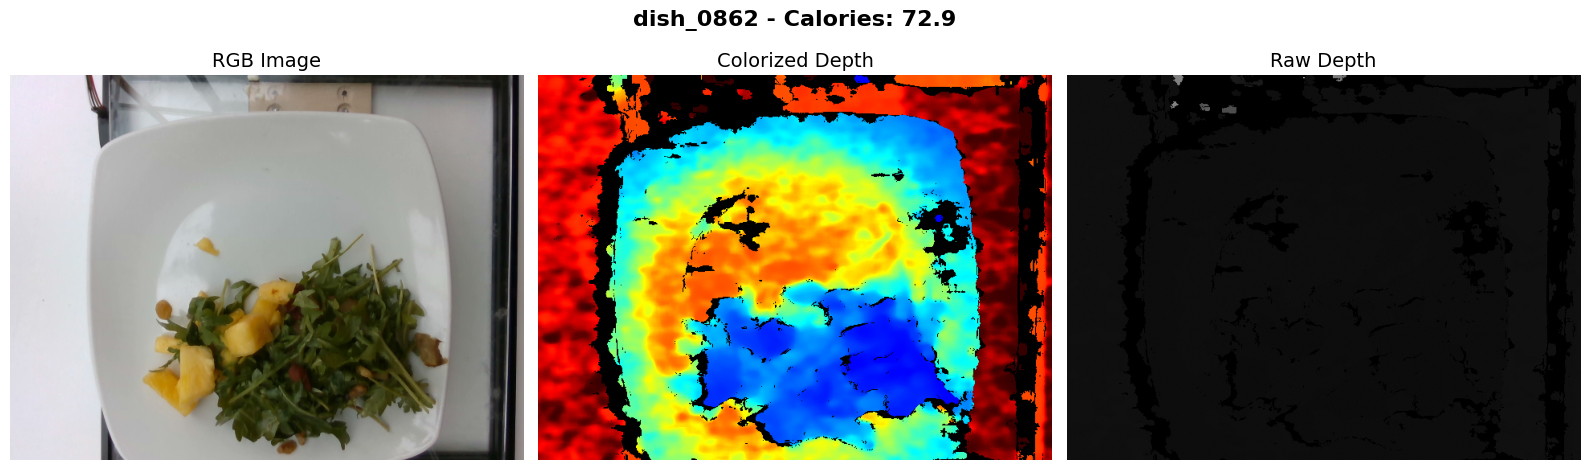

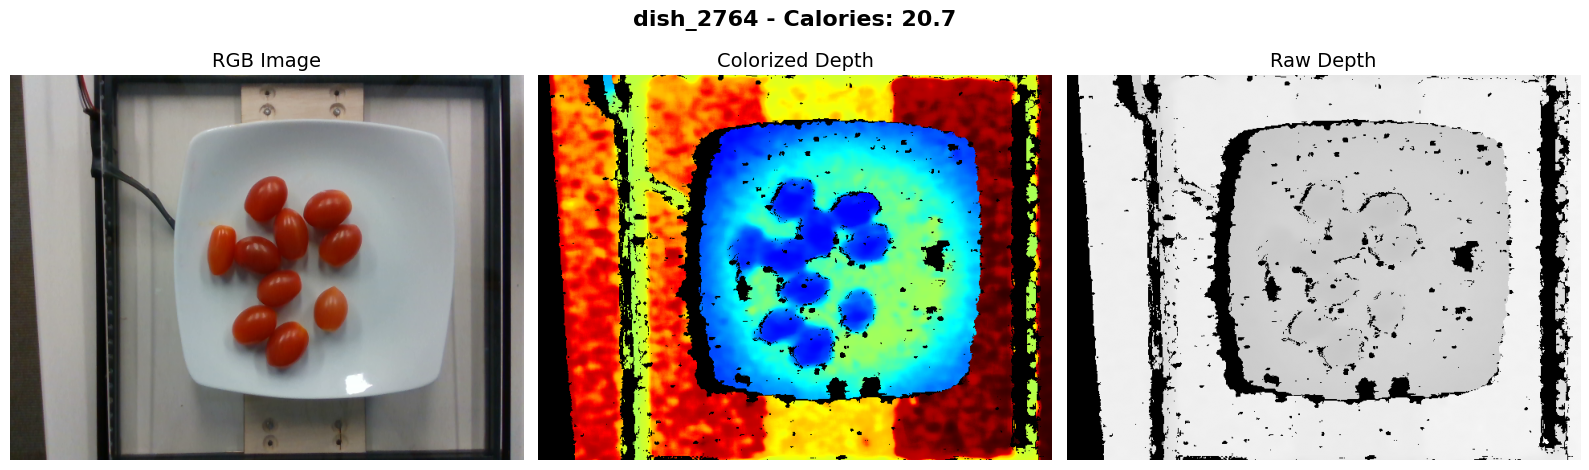

In [7]:
def visualize_sample(dish_id, df, train_dir):
    """可视化一个样本的所有模态"""
    rgb_path = train_dir / 'color' / dish_id / 'rgb.png'
    depth_color_path = train_dir / 'depth_color' / dish_id / 'depth_color.png'
    depth_raw_path = train_dir / 'depth_raw' / dish_id / 'depth_raw.png'
    
    fig, axes = plt.subplots(1, 3, figsize=(16, 5))
    
    # RGB
    if rgb_path.exists():
        rgb = Image.open(rgb_path)
        axes[0].imshow(rgb)
        axes[0].set_title('RGB Image', fontsize=14)
    else:
        axes[0].text(0.5, 0.5, 'Image not found', ha='center', va='center')
    axes[0].axis('off')
    
    # Depth Color
    if depth_color_path.exists():
        depth_color = Image.open(depth_color_path)
        axes[1].imshow(depth_color)
        axes[1].set_title('Colorized Depth', fontsize=14)
    else:
        axes[1].text(0.5, 0.5, 'Image not found', ha='center', va='center')
    axes[1].axis('off')
    
    # Depth Raw
    if depth_raw_path.exists():
        depth_raw = Image.open(depth_raw_path)
        axes[2].imshow(depth_raw, cmap='gray')
        axes[2].set_title('Raw Depth', fontsize=14)
    else:
        axes[2].text(0.5, 0.5, 'Image not found', ha='center', va='center')
    axes[2].axis('off')
    
    # 获取卡路里值
    id_col = df.columns[0]
    calorie_col = [col for col in df.columns if 'calorie' in col.lower()]
    if calorie_col:
        calorie_col = calorie_col[0]
    else:
        calorie_col = df.columns[1]
    
    calories = df[df[id_col] == dish_id][calorie_col].values[0]
    fig.suptitle(f'{dish_id} - Calories: {calories:.1f}', fontsize=16, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

if df is not None:
    print('随机可视化5个样本：\n')
    sample_ids = df[df.columns[0]].sample(min(5, len(df))).values
    for dish_id in sample_ids:
        visualize_sample(dish_id, df, train_dir)

## 6. 检查图像尺寸

In [8]:
if df is not None:
    print('检查图像尺寸：')
    id_col = df.columns[0]
    first_dish = df[id_col].iloc[0]
    
    rgb_path = train_dir / 'color' / first_dish / 'rgb.png'
    depth_raw_path = train_dir / 'depth_raw' / first_dish / 'depth_raw.png'
    
    if rgb_path.exists():
        rgb = Image.open(rgb_path)
        print(f'RGB尺寸: {rgb.size} (width x height)')
        print(f'RGB mode: {rgb.mode}')
    
    if depth_raw_path.exists():
        depth = Image.open(depth_raw_path)
        print(f'Depth尺寸: {depth.size} (width x height)')
        print(f'Depth mode: {depth.mode}')
        
        # 分析深度值
        depth_array = np.array(depth)
        print(f'\nDepth数值信息：')
        print(f'  dtype: {depth_array.dtype}')
        print(f'  范围: {depth_array.min()} - {depth_array.max()}')
        print(f'  平均值: {depth_array.mean():.2f}')
        print(f'  单位: 1米 = 10,000 units')

检查图像尺寸：
RGB尺寸: (640, 480) (width x height)
RGB mode: RGB
Depth尺寸: (640, 480) (width x height)
Depth mode: I;16

Depth数值信息：
  dtype: uint16
  范围: 0 - 6984
  平均值: 3166.51
  单位: 1米 = 10,000 units


## 7. 数据集大小

In [9]:
print('=' * 50)
print('数据集大小')
print('=' * 50)

def get_dir_size(path: Path) -> int:
    """计算目录总大小"""
    total = 0
    for entry in path.rglob('*'):
        if entry.is_file():
            total += entry.stat().st_size
    return total

if DATA_ROOT.exists():
    print('正在计算大小（可能需要一些时间）...')
    total_size = get_dir_size(DATA_ROOT)
    print(f"\n总大小: {total_size / (1024 ** 3):.2f} GB")
    print(f"总大小: {total_size / (1024 ** 2):.2f} MB")
else:
    print('❌ 数据目录不存在')

数据集大小
正在计算大小（可能需要一些时间）...

总大小: 2.96 GB
总大小: 3031.68 MB


## 8. 总结

运行上面所有单元格后，记录以下信息用于项目报告：

- [ ] 训练集样本数量
- [ ] 测试集样本数量
- [ ] 卡路里范围（最小、最大、平均）
- [ ] 图像尺寸
- [ ] 深度图数值范围
- [ ] 是否有缺失文件